# Практическая работа №4, 5

Часть 1

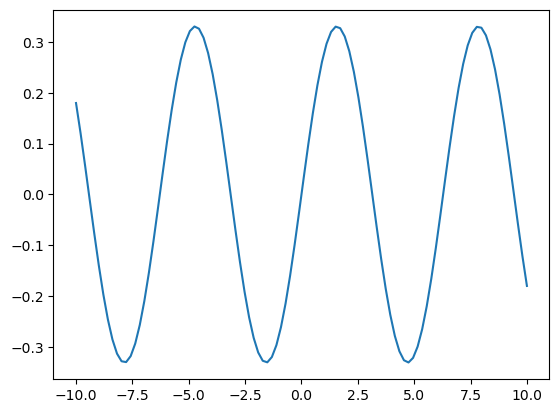

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# Генерируем последовательность чисел от -10 до 10 с 100 шагами
x = np.linspace(-10, 10, 100)
# Генерируем случайную амплитуду для синусоиды
a = np.random.random()
# Создаем второй массив с помощью синуса
y = a*np.sin(x)
# Функция создает линейный график на основе двух массивов
plt.plot(x, y, marker = "x")
plt.show()

Часть 2

In [1]:
import numpy as np
import pandas as pd

Загрузка данных

In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
 sheet_name='Canada by Citizenship',
 skiprows=range(20),
 skipfooter=2
 )
print('Данные загружены и записаны в dataframe!')

Данные загружены и записаны в dataframe!


Преобразование данных

In [3]:
print(df_can.shape)
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
all(isinstance(column, str) for column in df_can.columns)
df_can.columns = list(map(str, df_can.columns))
all(isinstance(column, str) for column in df_can.columns)
df_can.set_index('Country', inplace=True)
df_can.head()
# print(df_can.dtypes)
numeric_collums = df_can.select_dtypes(include=['int64']).columns
df_can['Total'] = df_can[numeric_collums].sum(axis=1)
df_can.head()

(195, 43)
Continent    object
Region       object
DevName      object
1980          int64
1981          int64
1982          int64
1983          int64
1984          int64
1985          int64
1986          int64
1987          int64
1988          int64
1989          int64
1990          int64
1991          int64
1992          int64
1993          int64
1994          int64
1995          int64
1996          int64
1997          int64
1998          int64
1999          int64
2000          int64
2001          int64
2002          int64
2003          int64
2004          int64
2005          int64
2006          int64
2007          int64
2008          int64
2009          int64
2010          int64
2011          int64
2012          int64
2013          int64
dtype: object


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Выборка нужных нам данных

In [5]:
years = list(map(str, range(1980, 2014)))
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)
df_top5 = df_can.head()
# Транспонирование таблицы
df_top5 = df_top5[years].transpose()
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Вывод данных в виде графика

Matplotlib version:  3.9.2


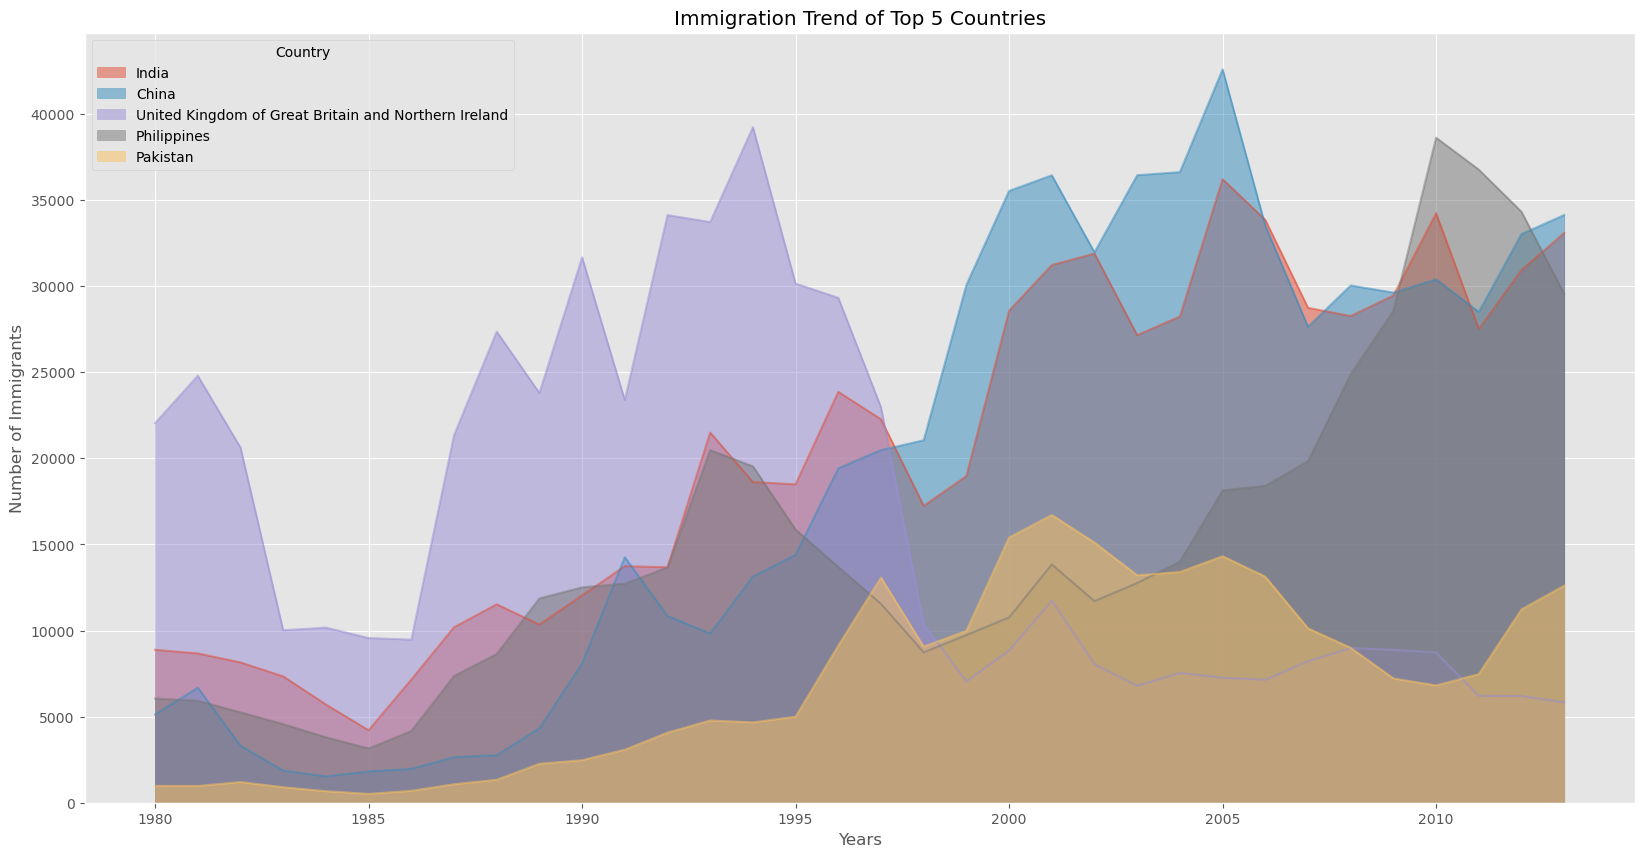

In [6]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # опционально: задаем стиль ggplot
# Проверяем версию Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0
# Для построения графика изменяем тип индексов строк (года)
# на integer
df_top5.index = df_top5.index.map(int)
# Построение графика типа ‘area’ встроенной
# в pandas суб-библиотекой matplotlib
df_top5.plot(kind='area',
 stacked=False,
 figsize=(20, 10), # размер области построения графика
 )
#Задаем наименование графика
plt.title('Immigration Trend of Top 5 Countries')
#Задаем наименование оси Y
plt.ylabel('Number of Immigrants')
#Задаем наименование оси X
plt.xlabel('Years')
# Выводим график со всеми параметрами на экран
plt.show()

#Практика №5

Обзор данных

In [7]:
df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

 Подготовка данных для гистограммы

In [8]:
#np.histogram возвращает два значения
count, bin_edges = np.histogram(df_can['2013'])
print(count) # подсчет частоты появления данных
print(bin_edges) # количество столбцов, по умолчанию – 10

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


Построение гистограммы

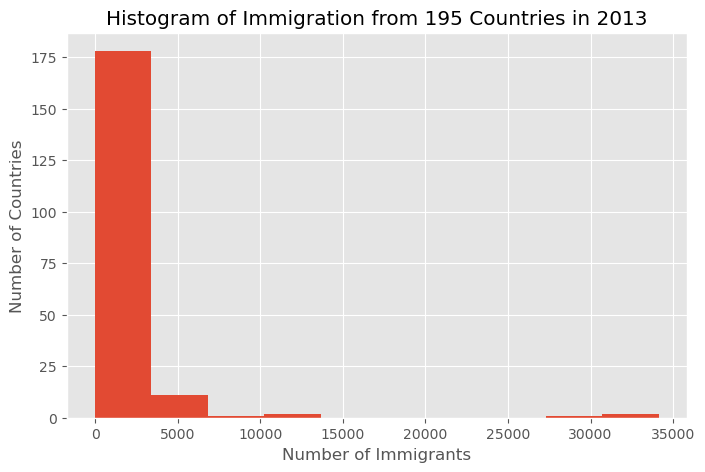

In [10]:
df_can['2013'].plot(kind='hist', figsize=(8, 5))
plt.title('Histogram of Immigration from 195 Countries in 2013') # добавление названия
plt.ylabel('Number of Countries') # добавление наименования оси у
plt.xlabel('Number of Immigrants') # наименование оси х
plt.show()

Построение Bar Charts (Dataframe)

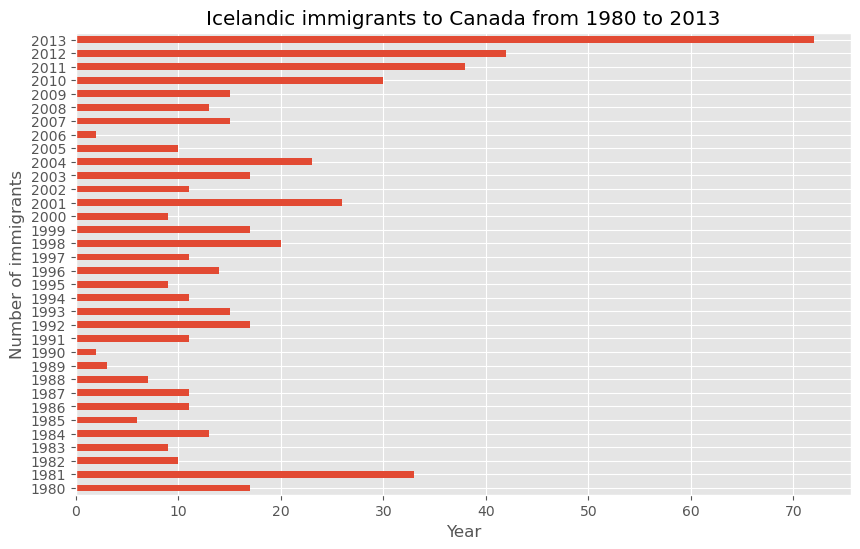

In [9]:
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()
df_iceland.plot(kind='barh', figsize=(10, 6))
plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot
plt.show()

# Код телеграм бота, выводящий изображения.

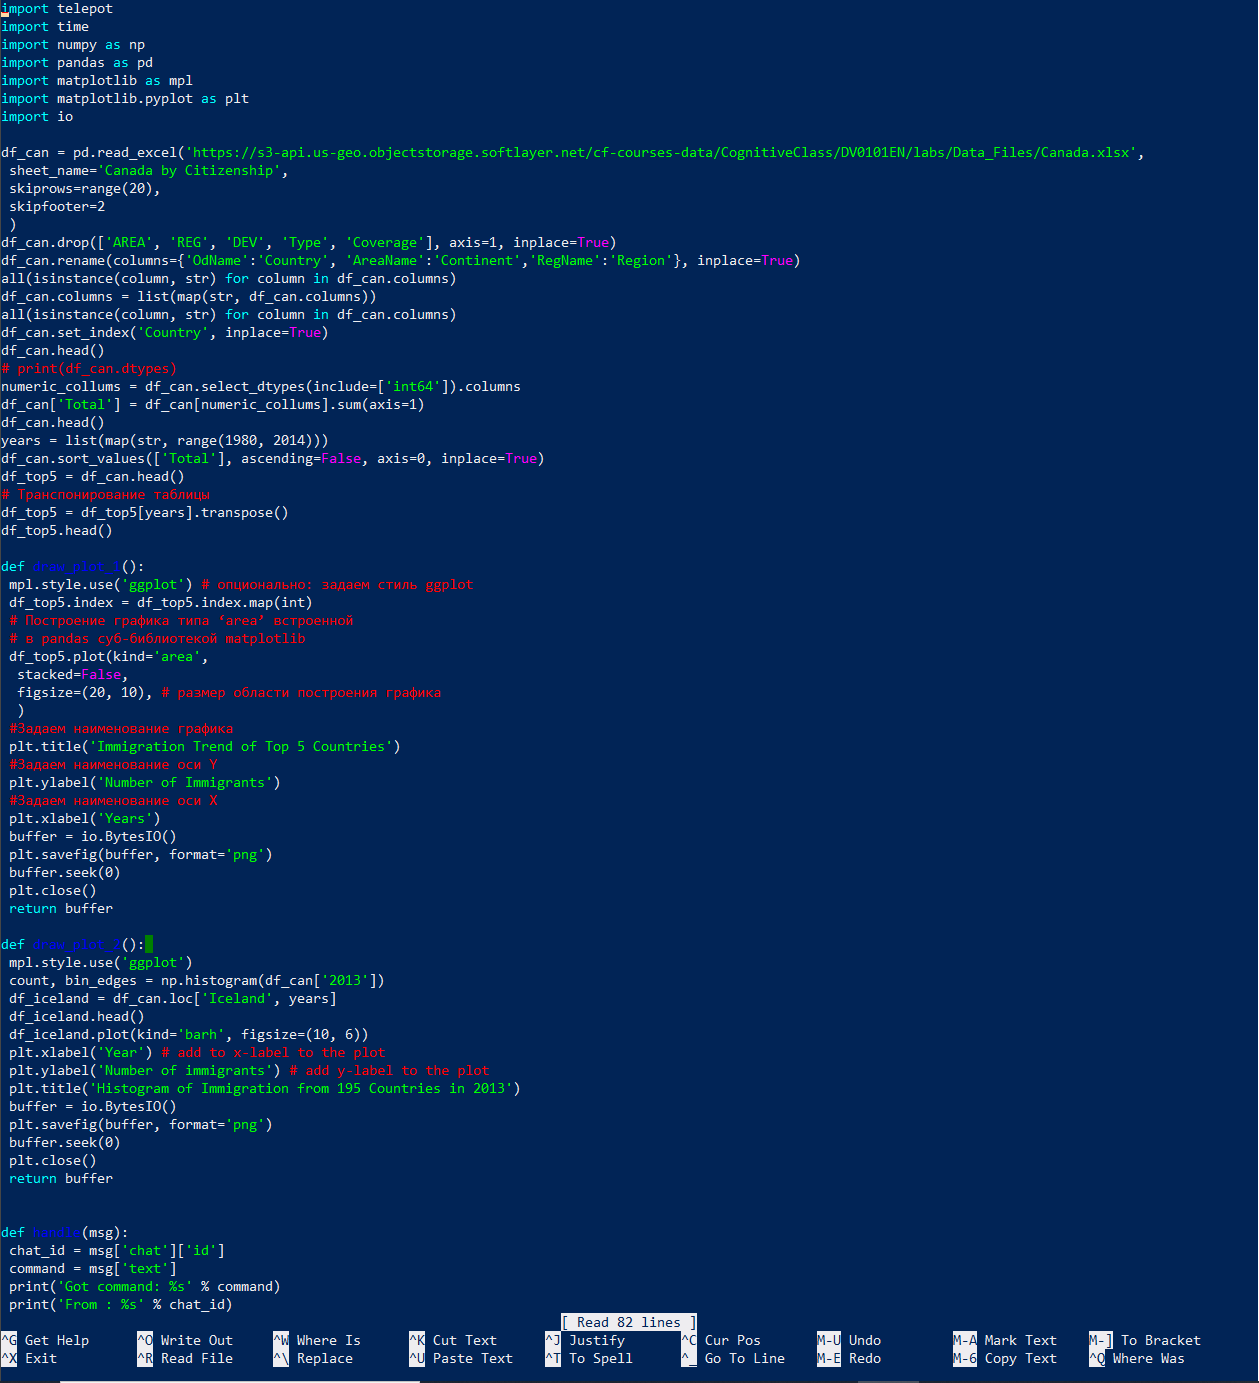

# Результат вывода

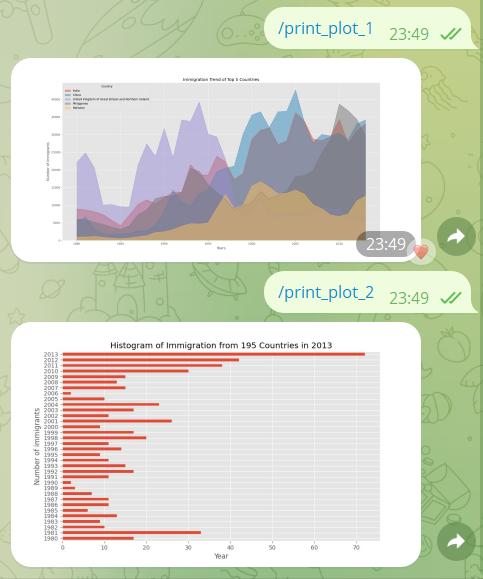

# Файл requirements.txt

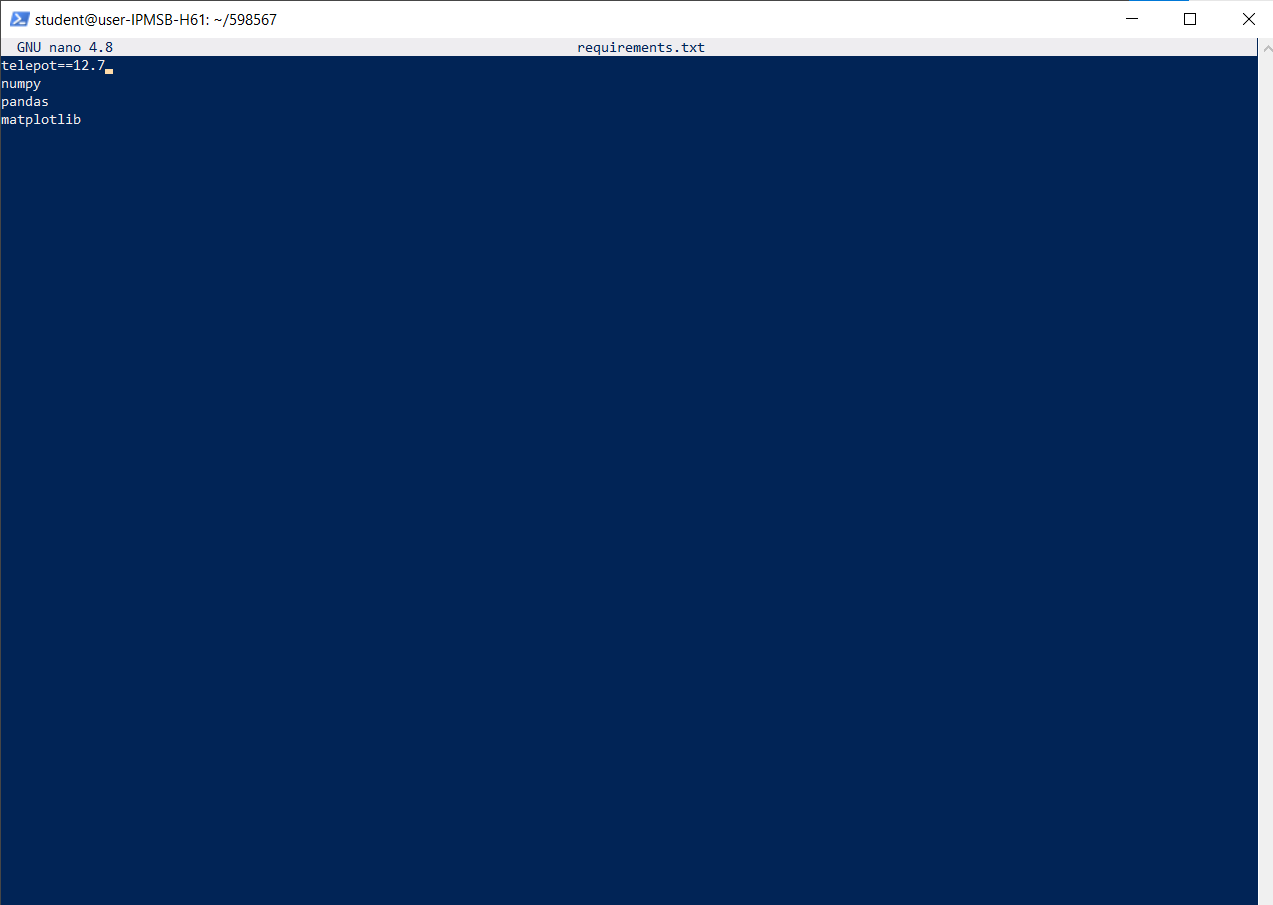

# Сохранение Docker файла

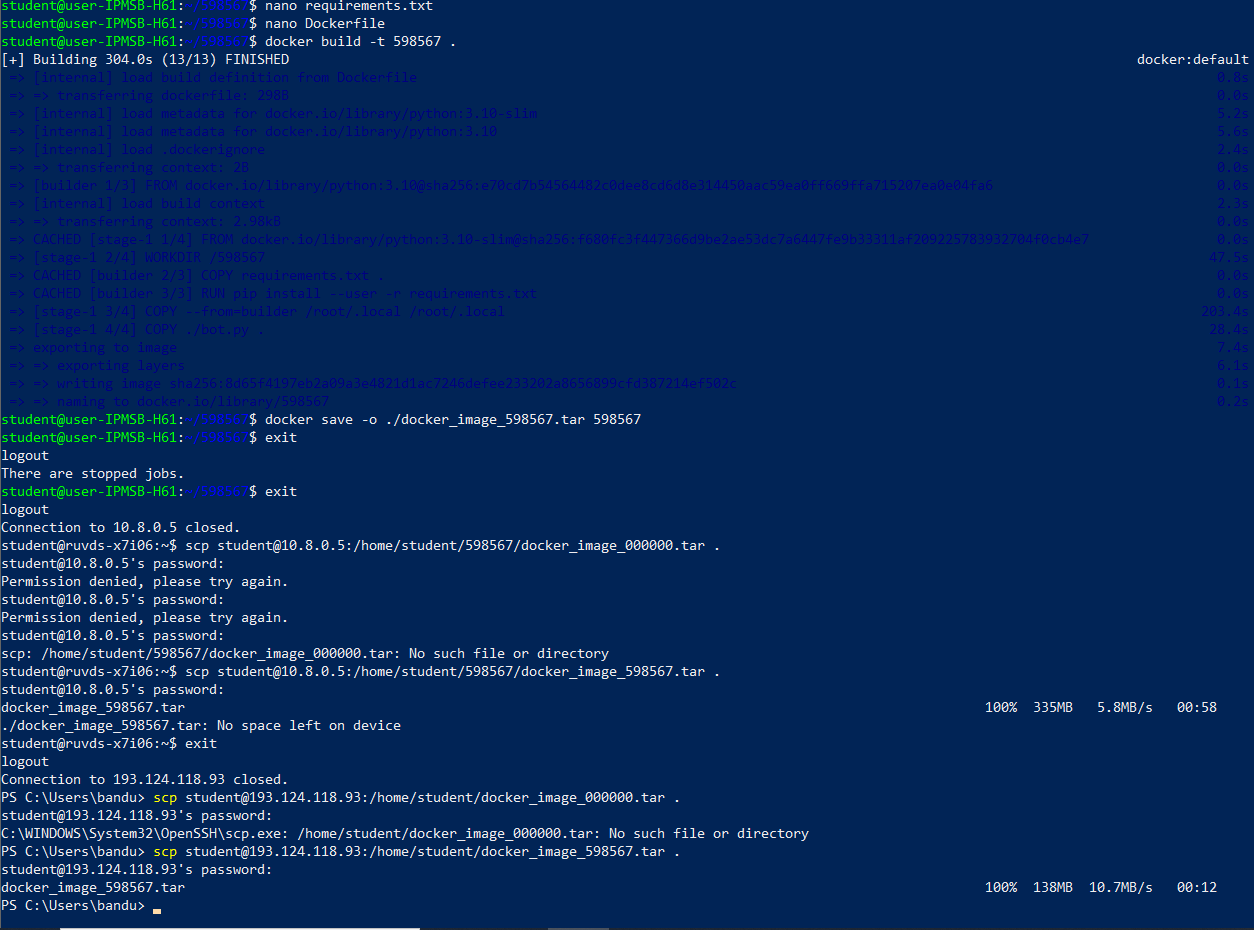

# Вывод
В результате выполнения лабораторной работы были получены навыки работы с библиотеками mathplotlib и pandas, а также были получены знания о библиотеке telebot такие, как вывод изображений по команде. В ходе лабораторной работы возникла ошибка в коде, отвечающем за преобразование исходных данных. Успешно устранена путем сложения столбцов таблицы, содержащих только численные значения.

Выполнил:\
Бандюков В.Ю.

Проверил:\
Шайхутдинов Д.В.